findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

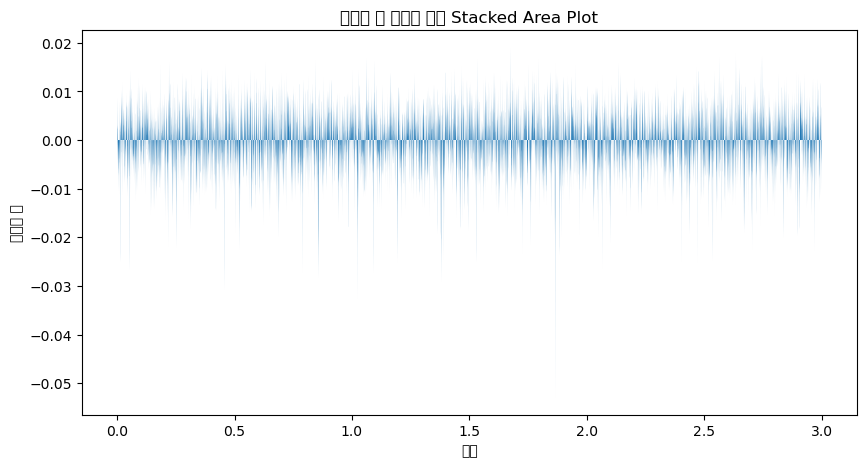

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# CSV 파일 로드
data = pd.read_csv('data/STFMK-20201105-LW15-2055_20201125_163909_004.csv')

# 데이터 전처리
# x와 y 값을 분리
x = data['x']
y = data['y']

# Stacked Area Plot 그리기
plt.figure(figsize=(10, 5))
plt.stackplot(x, y)
plt.xlabel('시간')
plt.ylabel('데이터 값')
plt.title('주파수 대 시간에 따른 Stacked Area Plot')
plt.show()

In [10]:
import pandas as pd

# CSV 파일 읽기
file_path = "data/STFMK-20201105-LW15-2055_20201125_163909_004.csv"
data = pd.read_csv(file_path)

# 데이터 구조 확인
print(data.head())
print(data.shape)

         x         y
0  0.00000  0.003176
1  0.00025  0.002670
2  0.00050  0.002354
3  0.00075  0.002277
4  0.00100  0.000140
(12000, 2)


C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-p

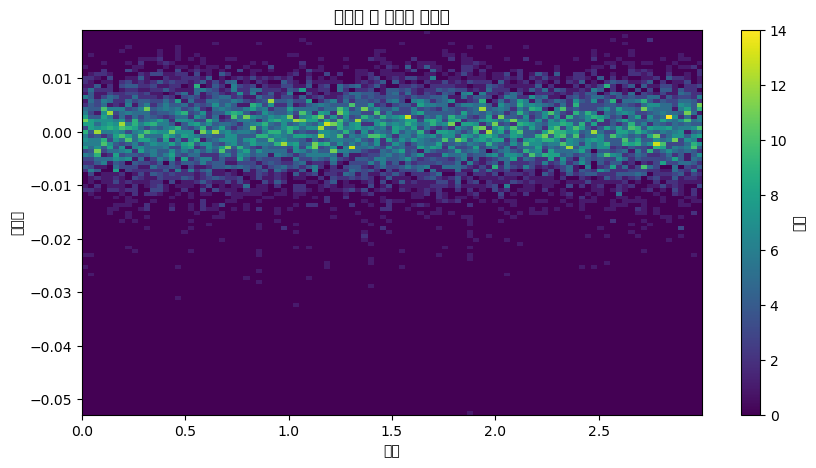

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
x = data['x']
y = data['y']

# 주파수와 시간 데이터를 이용하여 2차원 히트맵 생성
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(100, 100))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# 히트맵 플로팅
plt.figure(figsize=(10, 5))
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='빈도')
plt.xlabel('시간')
plt.ylabel('주파수')
plt.title('주파수 대 시간의 히트맵')
plt.show()

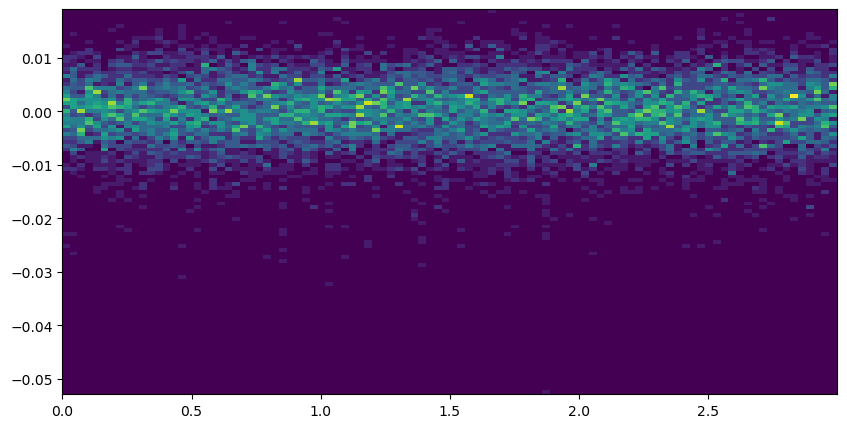

In [23]:
import matplotlib.pyplot as plt

# 기본 폰트 사용
plt.rcParams['font.family'] = 'sans-serif'

# 시각화 코드
plt.figure(figsize=(10, 5))
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto', cmap='viridis')
# plt.colorbar(label='빈도')
# plt.xlabel('시간')
# plt.ylabel('주파수')
# plt.title('주파수 대 시간의 히트맵')
plt.show()

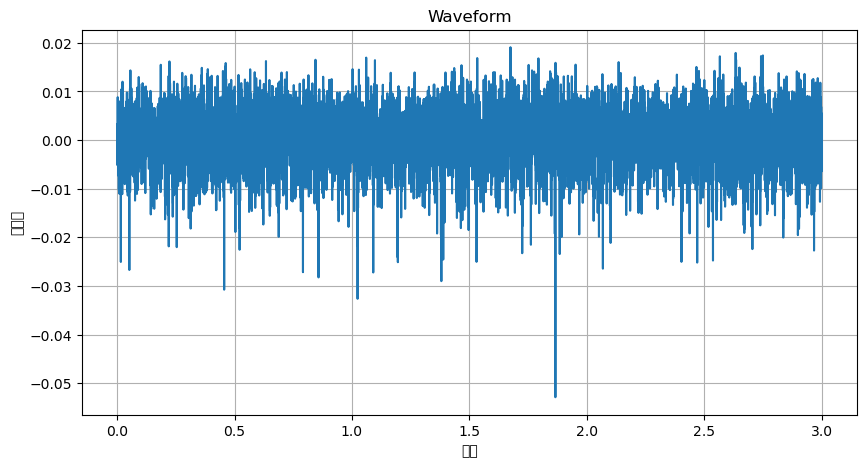

In [24]:
import matplotlib.pyplot as plt

# 데이터 로드
x = data['x']
y = data['y']

# Waveform 그리기
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel('시간')
plt.ylabel('주파수')
plt.title('Waveform')
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11580\3681936960.py:18: RuntimeWarning: invalid value encountered in divide
  transition_matrix = np.where(row_sums != 0, transition_matrix / row_sums, 0)


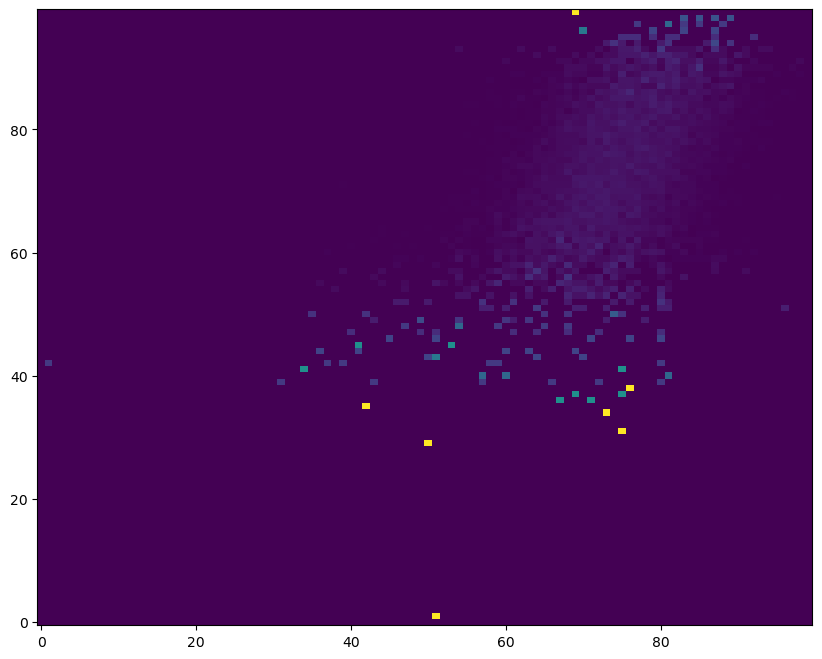

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 주파수 데이터 이산화
num_bins = 100  # 이산화할 구간 수
bins = np.linspace(min(data['y']), max(data['y']), num_bins + 1)

# 전환 행렬 생성
transition_matrix = np.zeros((num_bins, num_bins))
for i in range(len(data['y']) - 1):
    current_bin = np.digitize(data['y'][i], bins)  # 이산화된 값의 인덱스
    next_bin = np.digitize(data['y'][i + 1], bins)  # 이산화된 값의 인덱스
    if current_bin < num_bins and next_bin < num_bins:  # 인덱스가 범위 내에 있는 경우에만 계산
        transition_matrix[current_bin, next_bin] += 1

# 전환 행렬을 확률로 정규화
row_sums = np.sum(transition_matrix, axis=1, keepdims=True)
transition_matrix = np.where(row_sums != 0, transition_matrix / row_sums, 0)

# 전환 행렬 시각화
plt.figure(figsize=(10, 8))
plt.imshow(transition_matrix, cmap='viridis', origin='lower', aspect='auto')
# plt.colorbar(label='전이 확률')
# plt.xlabel('다음 주파수 구간')
# plt.ylabel('현재 주파수 구간')
# plt.title('주파수 전환 행렬')
plt.show()